# <font color=green>Resultados - GA Árvore de Steiner</font>

## Importação de dados:

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11,7)
np.set_printoptions(precision=9)

dirBase = os.getcwd() + "/"
dirSol = dirBase + "grafos/solucoes/"
#dirSaida = dirBase + "tst1/Exp8/Prim-Adj-Rem-90-RstBest/"
dirSaida = dirBase + "saida/"

In [12]:
pontos = ['80']#'10','20','30','40','50','60','70','80','90','100']#,'250','500','1000']
qtdPt = len(pontos)
qtdInst = 15
qtdTst = 30

solucao = np.zeros((qtdPt, qtdInst, 2))        # Ponto, instancia, smt e mst
teste = np.zeros((qtdPt, qtdInst, qtdTst, 2))  # Ponto, instancia, teste, smt e tempo de execução

In [13]:
for iPt in range(qtdPt):
    pt = pontos[iPt]
    for iInst in range(qtdInst):
        arq = pt + "." + str(iInst + 1)
        arqSol = dirSol + "estein" + arq
        
        # Abre arquivo de solução
        sol = open(arqSol, 'r')
        solucao[iPt][iInst][0] = float(sol.readline())  # smt da solução
        solucao[iPt][iInst][1] = float(sol.readline())  # mst da solução
        sol.close()
        
        for iTst in range(qtdTst):
            arqTeste = dirSaida + arq + "_tst" + str(iTst + 1)
            
            # Abre arquivo com dados do teste
            sai = open(arqTeste, 'r')
            sai.readline()                                      # dir do problema
            teste[iPt][iInst][iTst][1] = float(sai.readline())  # tempo de execucao
            sai.readline()                                      # parametros utilizados
            teste[iPt][iInst][iTst][0] = float(sai.readline())  # smt do teste
            sai.close()

## Média de distância por ponto:

Pontos	Teste		Ótimo		% Diferença
80	5.924113539	5.922725505	0.023435722


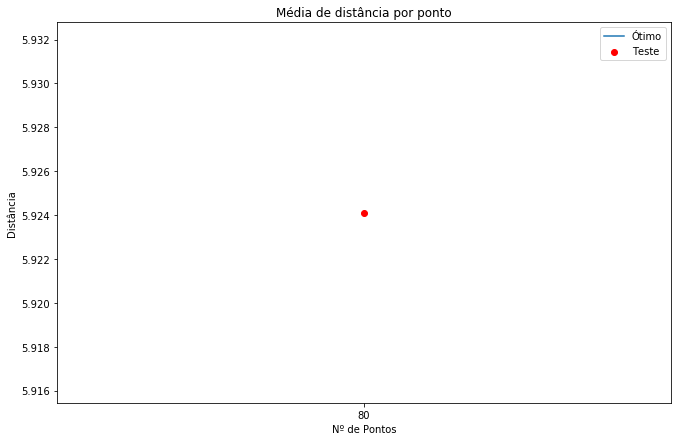

In [14]:
# Tabela
print ("Pontos\tTeste\t\tÓtimo\t\t% Diferença")
mediaTst = [0] * qtdPt # Gráfico Y
mediaSol = [0] * qtdPt # Gráfico Y
for iPt in range(qtdPt):
    mediaTst[iPt] = teste[iPt][...][...,0].mean()   # Média do teste
    mediaSol[iPt] = solucao[iPt][...,0].mean()      # Média da solução (ótimo)
    dif =  mediaTst[iPt] - mediaSol[iPt]
    reducao = (dif * 100) / mediaSol[iPt]           # Percentual de redução
    print (pontos[iPt] + "\t" + "{:.9f}".format(mediaTst[iPt]) + "\t" + "{:.9f}".format(mediaSol[iPt]) + "\t" + "{:.9f}".format(reducao))

# Gráfico
plt.scatter(pontos, mediaTst, c='red', label='Teste')
plt.plot(pontos, mediaSol, label='Ótimo')
plt.xlabel('Nº de Pontos')
plt.ylabel('Distância')
plt.title('Média de distância por ponto')
plt.legend()
plt.show()

## Média de tempo por ponto:

Pontos	Tempo de Execução (s)
80	23.2


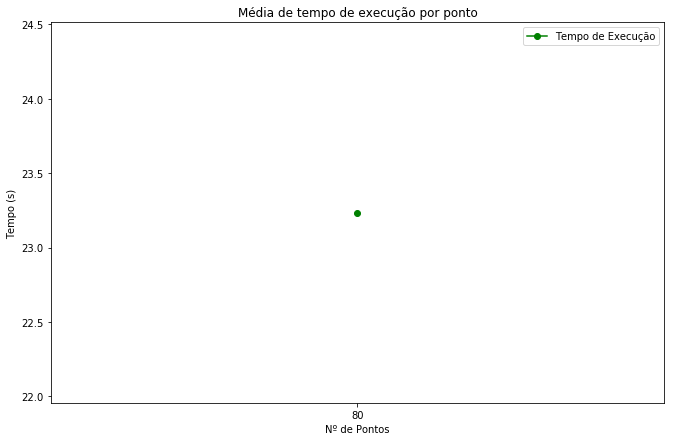

In [15]:
# Tabela
print ("Pontos\tTempo de Execução (s)")
mediaTstCPU = [0] * qtdPt # Gráfico Y
for iPt in range(qtdPt):
    mediaTstCPU[iPt] = teste[iPt][...][...,1].mean()   # Média de tempo do teste
    print (pontos[iPt] + "\t" + "{:.1f}".format(mediaTstCPU[iPt]))
    
# Gráfico
plt.plot(pontos, mediaTstCPU, marker='o', c='green', label='Tempo de Execução')
plt.xlabel('Nº de Pontos')
plt.ylabel('Tempo (s)')
plt.title('Média de tempo de execução por ponto')
plt.legend()
plt.show()

## Média percentual de redução por ponto:

Pontos	Máximo Tst.	Média Tst.	Média Opt.
80	3.03%		3.02% ± 0.027	3.04%


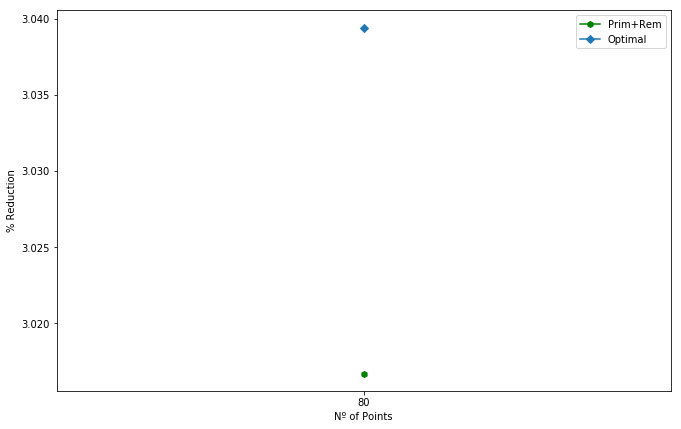

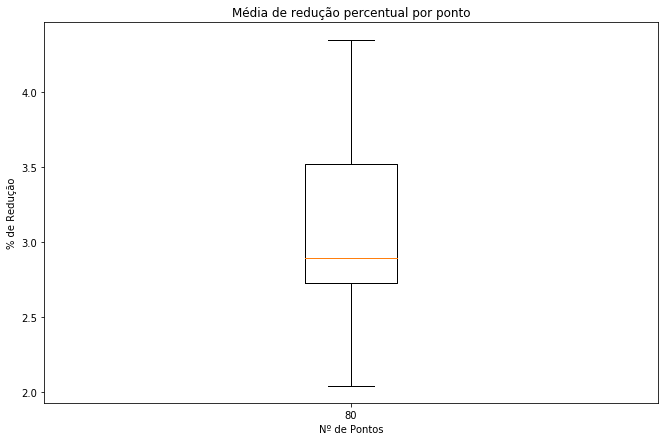

In [17]:
# Calcula % de redução
redSolucao = np.zeros((qtdPt, qtdInst))        # Ponto, instancia, % de redução da smt da solução
redTeste = np.zeros((qtdPt, qtdInst, qtdTst))  # Ponto, instancia, % de redução da smt do teste
for iPt in range(qtdPt):
    for iInst in range(qtdInst):
        smtSol = solucao[iPt][iInst][0]        # SMT da solução
        mstSol = solucao[iPt][iInst][1]        # MST da solução
        redSolucao[iPt][iInst] = ((mstSol - smtSol) * 100) / mstSol   # % de redução da Solução
        for iTst in range(qtdTst):
            smtTeste = teste[iPt][iInst][iTst][0]        # SMT do teste
            redTeste[iPt][iInst][iTst] = ((mstSol - smtTeste) * 100) / mstSol   # % de redução do teste

# Tabela
mediaRedTst = [0] * qtdPt # Gráfico Y
mediaRedSol = [0] * qtdPt # Gráfico Y
print ("Pontos\tMáximo Tst.\tMédia Tst.\tMédia Opt.")
for iPt in range(qtdPt):
    mediaRedSol[iPt] = redSolucao[iPt][...].mean()
    mediaRedTst[iPt] = redTeste[iPt][...][...].mean()
    redMaxTst = np.zeros((qtdInst))
    somaDesvInst = 0
    for iInst in range(qtdInst):
        redMaxTst[iInst] = redTeste[iPt][iInst][...].max()  # Máximo por instâncias
        mediaInst = redTeste[iPt][iInst][...].mean()        # Média por instância
        for iTst in range(qtdTst):
            somaDesvInst += (redTeste[iPt][iInst][iTst] - mediaInst) ** 2
    mediaRedMaxTst = redMaxTst.mean()
    desvPadTst = np.sqrt(somaDesvInst / ((qtdInst - 1) * qtdInst))
    print (pontos[iPt] + "\t" + "{:.2f}".format(mediaRedMaxTst) + "%\t\t" + 
           "{:.2f}".format(mediaRedTst[iPt]) + "% ± "+"{:.3f}".format(desvPadTst) + "\t" + 
           "{:.2f}".format(mediaRedSol[iPt]) + "%")
    
# Dados do Box
dadosBox = []
for iPt in range(qtdPt):
    dadosBox.append(redTeste[iPt][...][...].flatten())

# Gráfico
#plt.scatter(pontos, mediaRedTst, c='red', label='Teste')
plt.plot(pontos, mediaRedTst, c='green', label='Prim+Rem', marker="h")
plt.plot(pontos, mediaRedSol, label='Optimal', marker="D")
plt.xlabel('Nº of Points')
plt.ylabel('% Reduction')
#plt.title('Média de redução percentual por ponto')
plt.legend()
plt.show()

# Gráfico
plt.boxplot(dadosBox, labels=pontos)
plt.xlabel('Nº de Pontos')
plt.ylabel('% de Redução')
plt.title('Média de redução percentual por ponto')
plt.show()

In [18]:
print ("Pontos\tInst.\tMax.\tMédia\tMédia Opt.\n----------------------------------")
for iPt in range(qtdPt):
    for iInst in range(qtdInst):
        mediaRedSol = redSolucao[iPt][iInst].mean()
        mediaRedInst = redTeste[iPt][iInst][...].mean()
        maxRedInst = redTeste[iPt][iInst][...].max()
        atencao = "<-" if (mediaRedInst < mediaRedSol) else ""
        print(pontos[iPt] + "\t" + "{:02d}".format(iInst+1) + "\t" + 
              "{:.2f}".format(maxRedInst) + "%\t" + 
              "{:.2f}".format(mediaRedInst) + "%\t" + 
              "{:.2f}".format(mediaRedSol) + "%\t" + atencao)
    print("----------------------------------")

Pontos	Inst.	Max.	Média	Média Opt.
----------------------------------
80	01	2.89%	2.84%	2.89%	<-
80	02	2.76%	2.72%	2.76%	<-
80	03	3.00%	2.97%	3.00%	<-
80	04	2.15%	2.13%	2.15%	<-
80	05	2.21%	2.21%	2.21%	<-
80	06	2.86%	2.85%	2.86%	<-
80	07	4.35%	4.35%	4.41%	<-
80	08	3.56%	3.54%	3.56%	<-
80	09	3.88%	3.88%	3.88%	
80	10	2.91%	2.91%	2.91%	<-
80	11	2.95%	2.88%	2.95%	<-
80	12	2.04%	2.04%	2.04%	<-
80	13	3.22%	3.22%	3.25%	<-
80	14	3.86%	3.85%	3.86%	<-
80	15	2.86%	2.86%	2.86%	<-
----------------------------------


In [20]:
print ("Pontos\tInst.\tFitness\tSolucao\t\tDif\n----------------------------------")
for iPt in range(qtdPt):
    pt = pontos[iPt]
    for iInst in range(qtdInst):
        smtMedio = teste[iPt][iInst][...,0].mean()   # Média da SMT por instancia
        smtSol = solucao[iPt][iInst,0]               # SMT da solução
        print(str(pt)+'\t'+"{:2.0f}".format(iInst+1)+'\t'+
              "{:.7f}".format(smtMedio)+'\t'+
              "{:.7f}".format(smtSol)+'\t'+
              "{:.7f}".format(smtSol-smtMedio))

Pontos	Inst.	Fitness	Solucao		Dif
----------------------------------
80	 1	6.2608144	6.2574180	-0.0033964
80	 2	5.6975881	5.6953963	-0.0021918
80	 3	5.8745589	5.8724801	-0.0020788
80	 4	5.6258567	5.6241641	-0.0016926
80	 5	5.7545655	5.7545116	-0.0000539
80	 6	6.1636574	6.1632528	-0.0004047
80	 7	6.0344359	6.0308500	-0.0035860
80	 8	5.9540062	5.9528555	-0.0011508
80	 9	6.1076728	6.1076729	0.0000000
80	10	5.7151536	5.7147350	-0.0004186
80	11	5.7687101	5.7648361	-0.0038740
80	12	5.6731388	5.6731388	-0.0000000
80	13	5.9700329	5.9683681	-0.0016648
80	14	6.1180423	6.1178198	-0.0002225
80	15	6.1434693	6.1433837	-0.0000856
